In [18]:
!pip install pandas numpy matplotlib seaborn scipy openpyxl

DEPRECATION: Loading egg at c:\users\karti\appdata\local\programs\python\python312\lib\site-packages\chardet-5.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\karti\appdata\local\programs\python\python312\lib\site-packages\dbgpt-0.5.5-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\karti\appdata\local\programs\python\python312\lib\site-packages\importlib_resources-5.12.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\user

In [19]:

import pandas as pd
import numpy as np

# Display settings (helps with wide datasets)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import os
os.getcwd()
print(os.path.exists("C:/Users/karti/Downloads/Online Retail Dataset.xlsx"))



True


In [42]:
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv(
    "C:/Users/karti/Downloads/Online Retail Dataset.csv"
)


In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542014 entries, 0 to 542013
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    542014 non-null  object 
 1   StockCode    542014 non-null  object 
 2   Description  540560 non-null  object 
 3   Quantity     542014 non-null  int64  
 4   InvoiceDate  542014 non-null  object 
 5   UnitPrice    542014 non-null  float64
 6   CustomerID   406934 non-null  float64
 7   Country      542014 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Preprocessing

#### Convert date data to datetime


In [26]:
df["InvoiceDate"] = pd.to_datetime(
    df["InvoiceDate"],
    dayfirst=True
)


#### Extracting data 'year', 'month', 'day', 'hour', 'day of week'

In [30]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['dayofweek'] = df['InvoiceDate'].dt.dayofweek

#### Extracting data 'year' and 'month'


In [34]:
df['year_month']=df['InvoiceDate'].dt.strftime('%Y-%m')

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,dayofweek,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12


#### Add the column which shows 'Amount' which is calucrated by multiplying 'Quantity' with 'UnitPrice'

In [36]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,dayofweek,year_month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,2010-12,20.34


## Data Visualization

#### Total amount by year

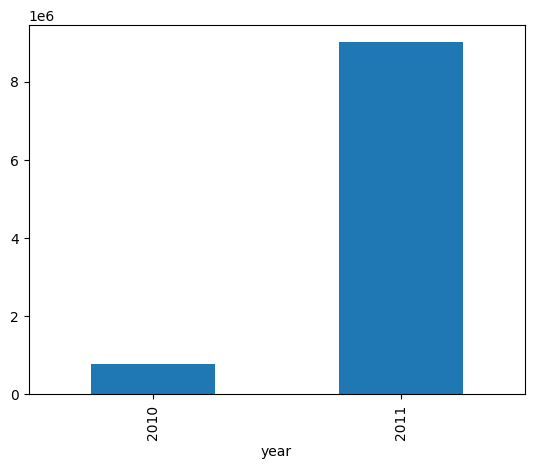

In [39]:
df.groupby('year')['Amount'].sum().plot.bar();

#### Time series by amount

In [40]:
df1=pd.DataFrame(df.groupby('year_month')['Amount'].sum())
df1=df1.reset_index()

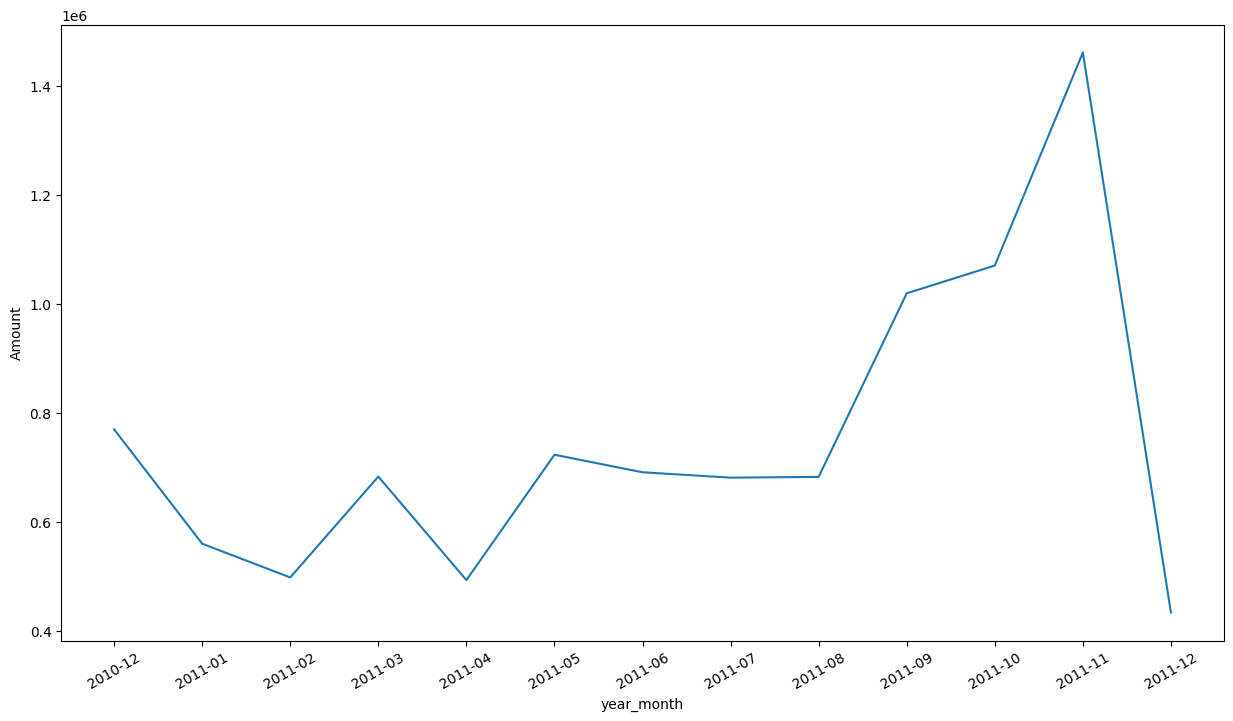

In [43]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df1,x='year_month',y='Amount')
plt.xticks(rotation=30);

## Amount ratio by countries

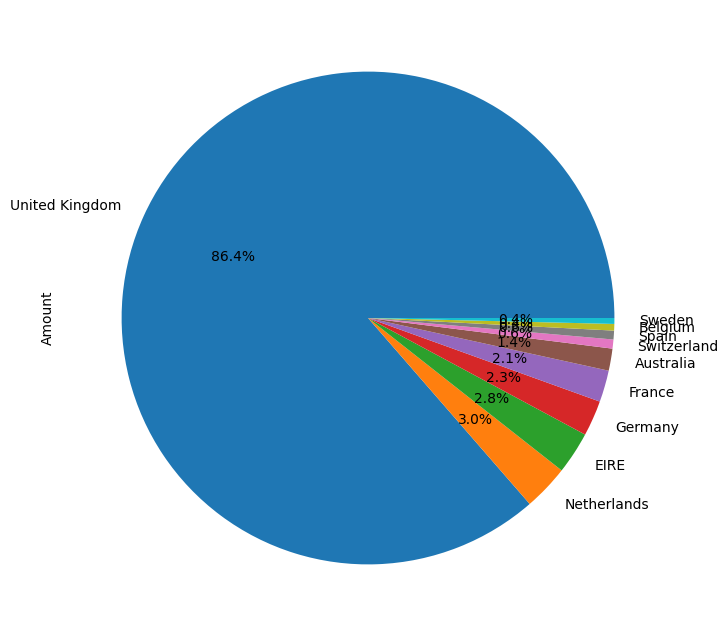

In [44]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10).plot.pie(autopct="%1.1f%%",figsize=(15, 8));

#### Top 50 products which sell well

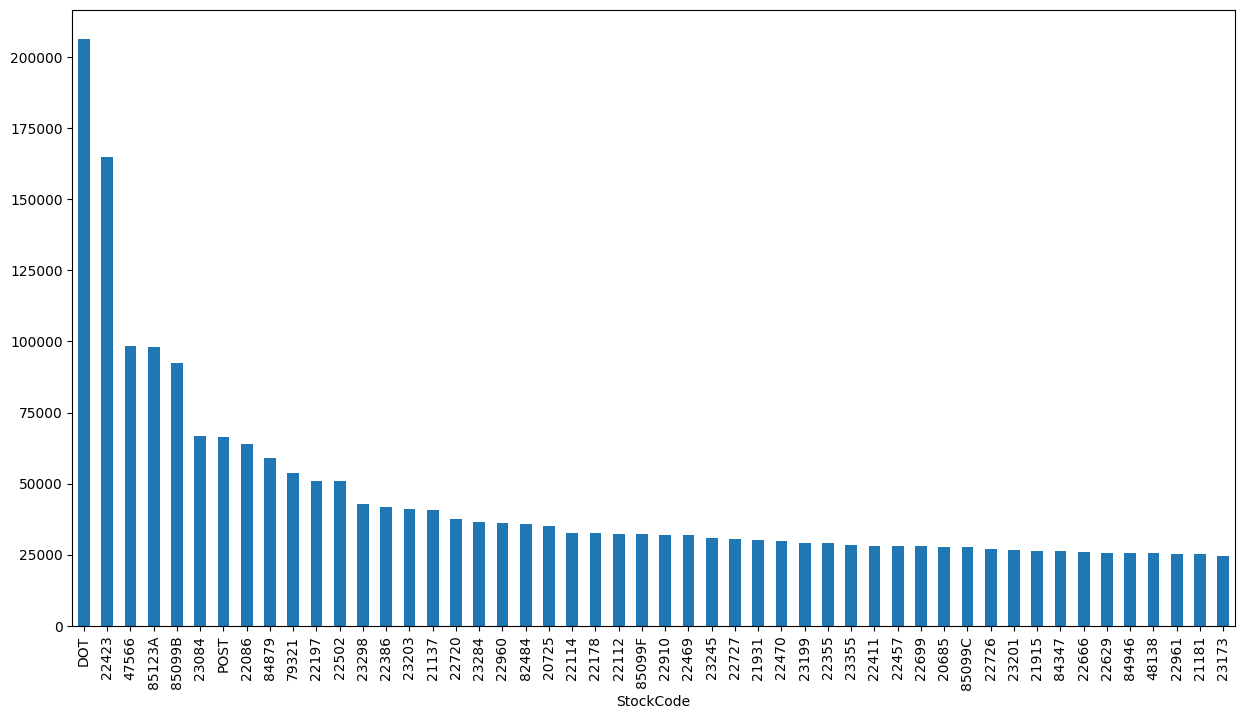

In [45]:
df.groupby('StockCode')['Amount'].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(15, 8));

#### Cumulative sum curve of products which sell well

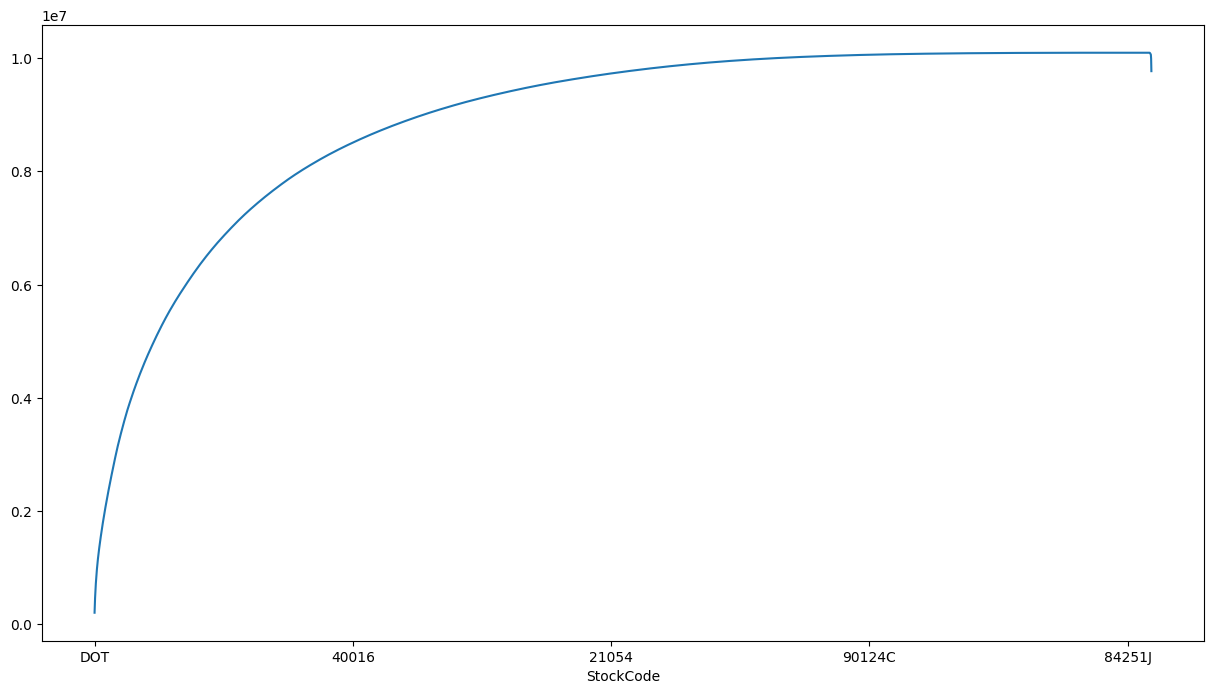

In [46]:
df_rev=pd.DataFrame(df.groupby('StockCode')['Amount'].sum().sort_values(ascending=False))
df_rev['Amount'].cumsum().plot(figsize=(15, 8));

#### Pareto principle

In [47]:
df_rev['Amount'].head(800).sum()/df_rev['Amount'].sum()

0.8197712416981237

In [48]:
800/df_rev.index.nunique()

0.19545565599804543

#### 20% of items occupy more than 80% of revenue.

#### Worst 50 products which do not sell well

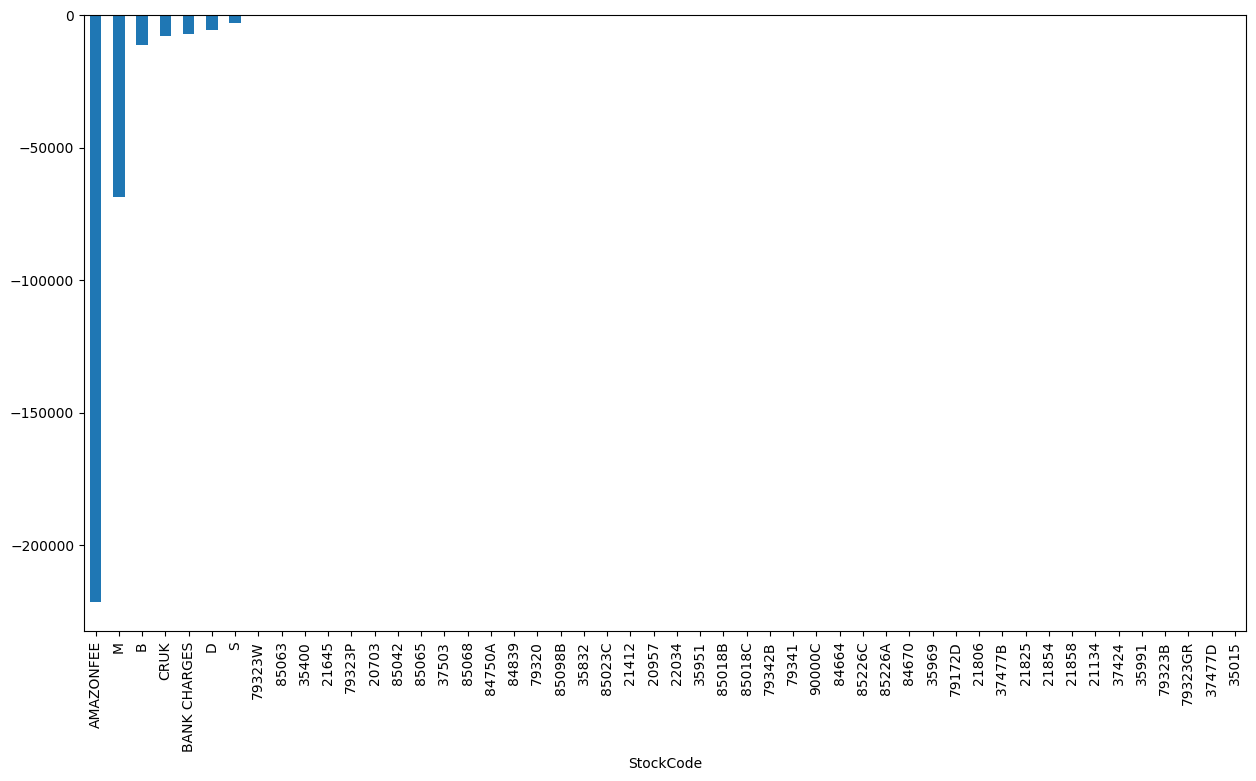

In [49]:
df.groupby('StockCode')['Amount'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));

#### Fee for Amazon occupy negative revenue.

#### Time Series, Unitprice Boxplot, Unitprice Time Series, Quantity Boxplot, Quantity Time Series of main products, 'DOT', '22423' and 'AMAZON FEE

#### 1) DOT

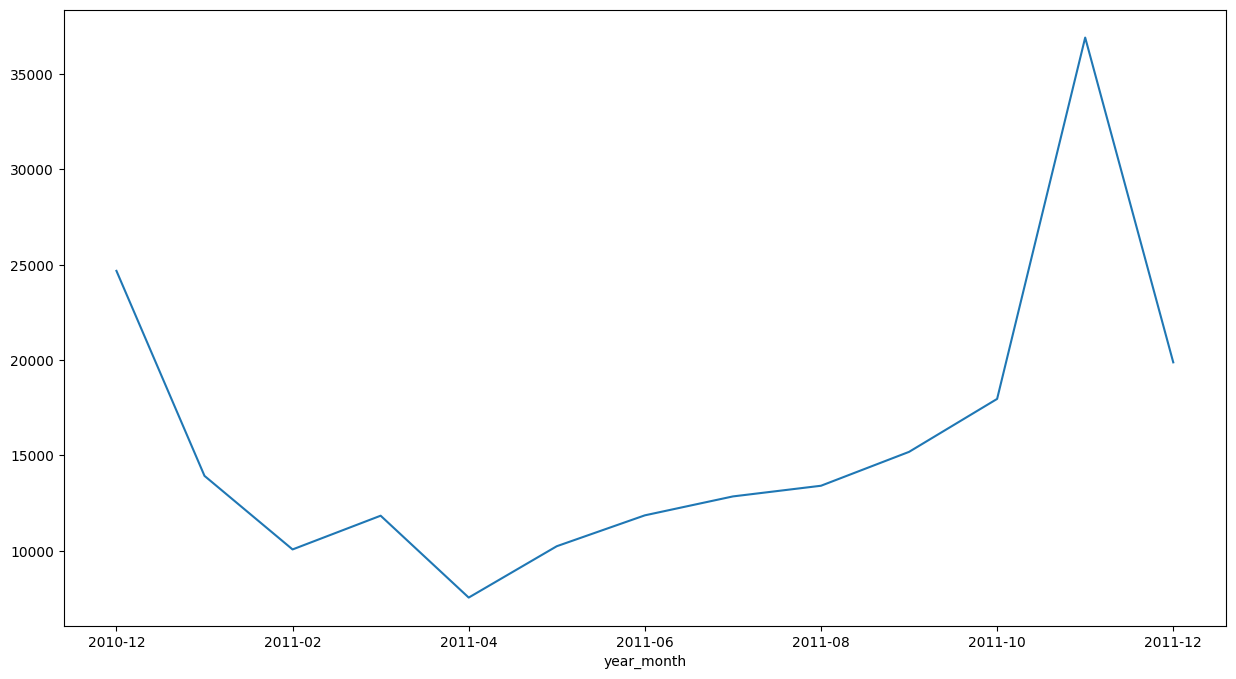

In [51]:
df[df['StockCode']=='DOT'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

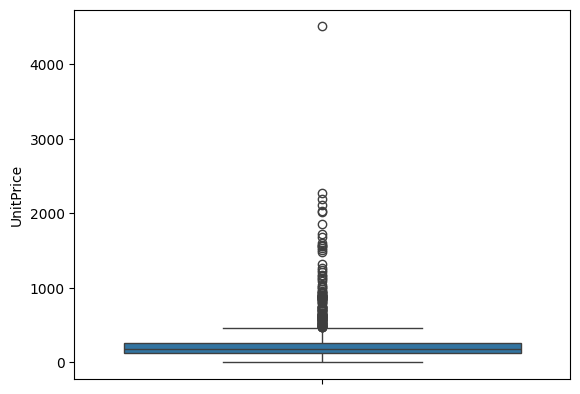

In [52]:
sns.boxplot(df[df['StockCode']=='DOT']['UnitPrice']);

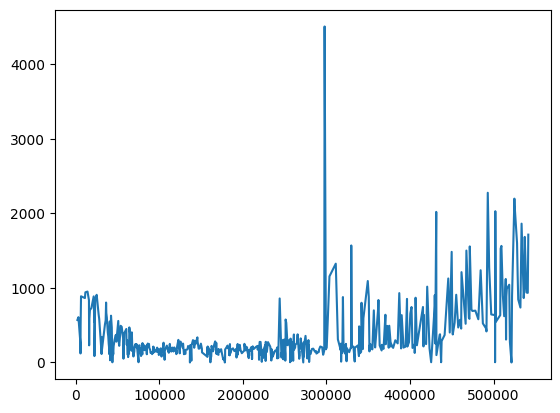

In [53]:
df[df['StockCode']=='DOT']['UnitPrice'].plot();

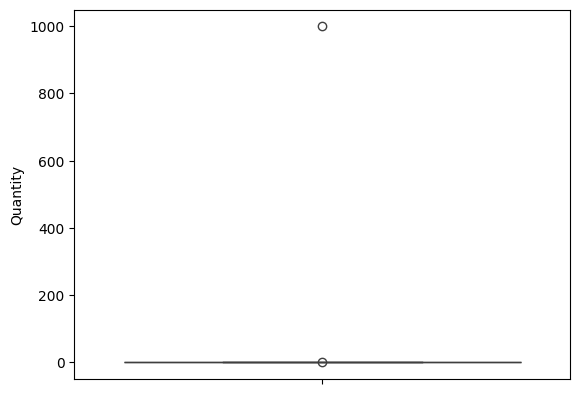

In [54]:
sns.boxplot(df[df['StockCode']=='DOT']['Quantity']);

<Axes: >

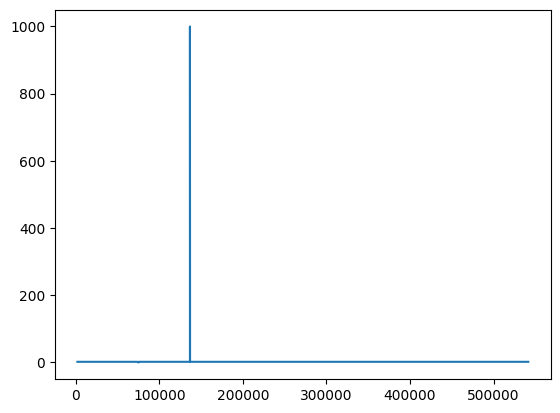

In [55]:
df[df['StockCode']=='DOT']['Quantity'].plot()

#### 2) 22423

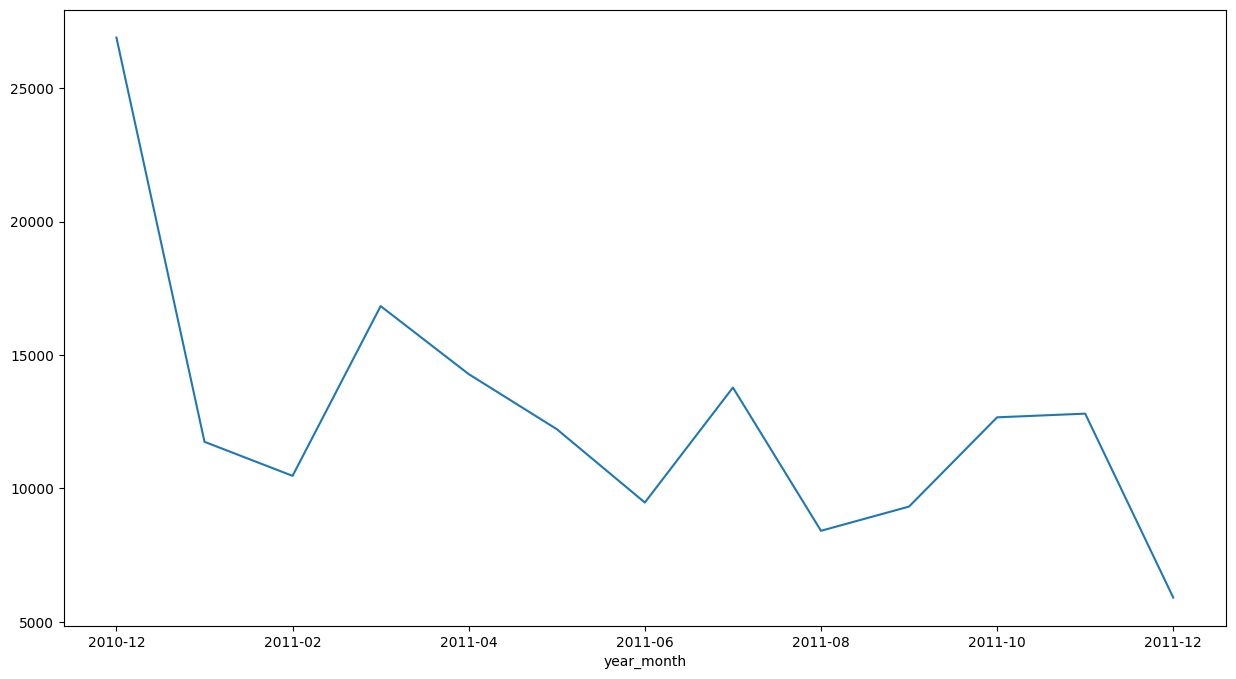

In [56]:
df[df['StockCode']=='22423'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

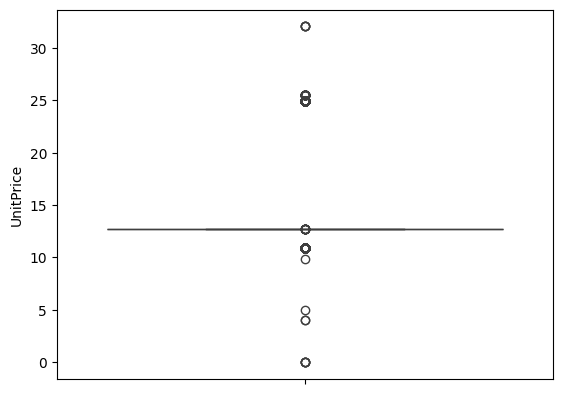

In [57]:
sns.boxplot(df[df['StockCode']=='22423']['UnitPrice']);

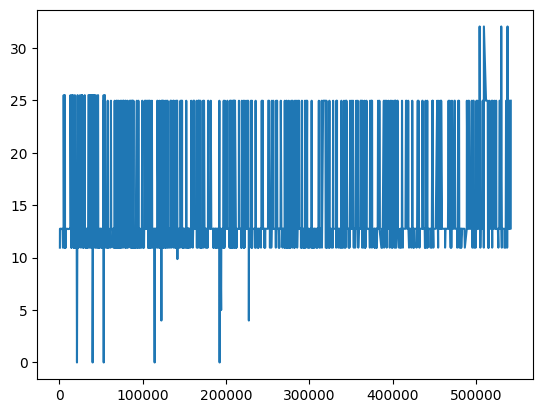

In [58]:
df[df['StockCode']=='22423']['UnitPrice'].plot();

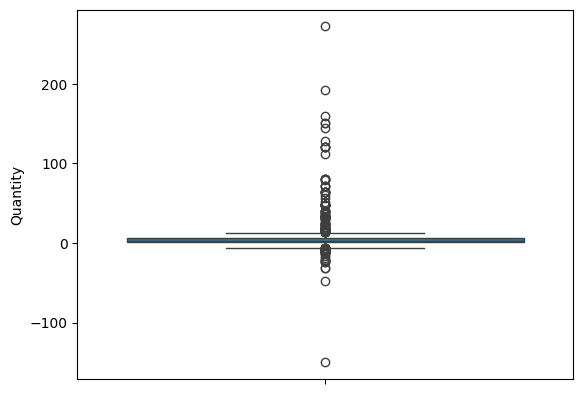

In [59]:
sns.boxplot(df[df['StockCode']=='22423']['Quantity']);

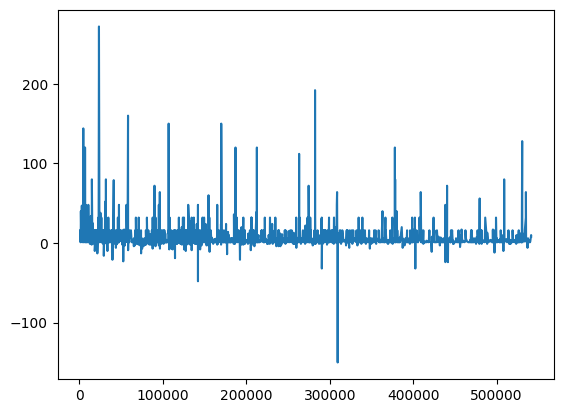

In [60]:
df[df['StockCode']=='22423']['Quantity'].plot();

#### 3) AMAZON FEE

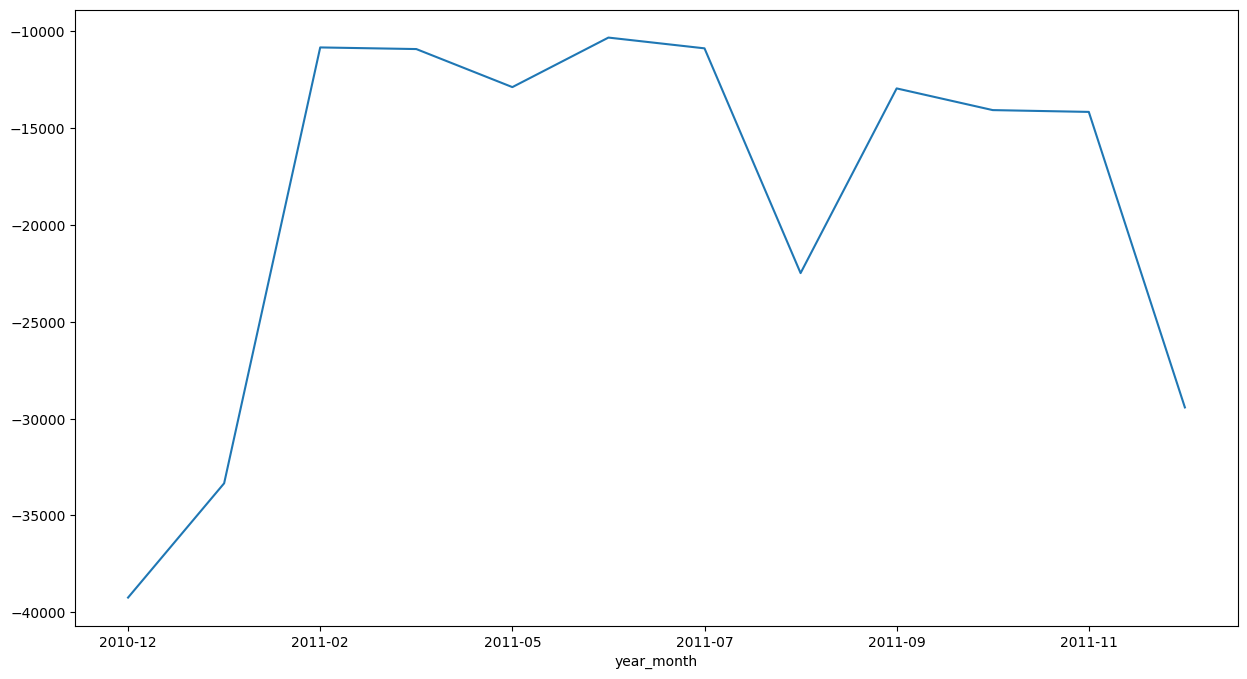

In [61]:
df[df['StockCode']=='AMAZONFEE'].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

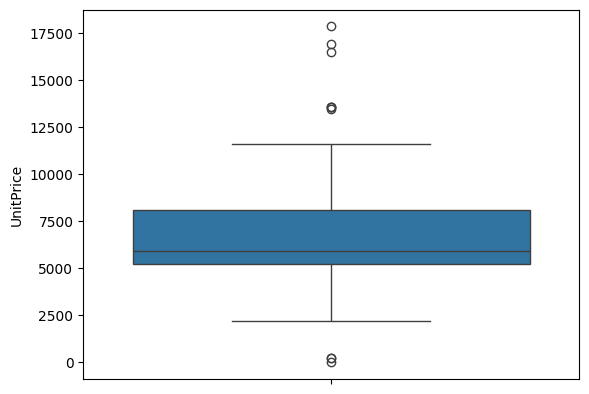

In [62]:
sns.boxplot(df[df['StockCode']=='AMAZONFEE']['UnitPrice']);

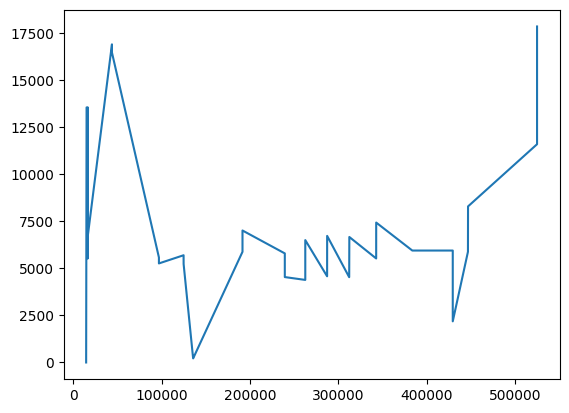

In [63]:
df[df['StockCode']=='AMAZONFEE']['UnitPrice'].plot();

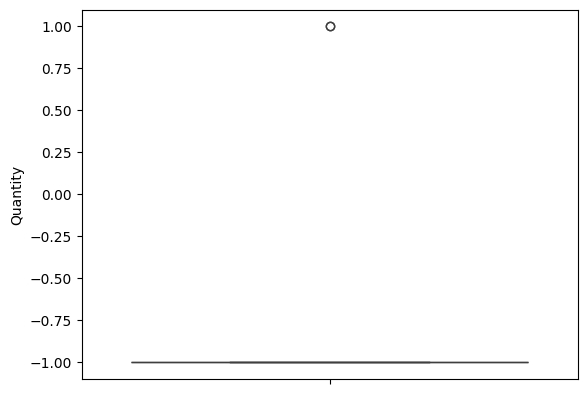

In [64]:
sns.boxplot(df[df['StockCode']=='AMAZONFEE']['Quantity']);

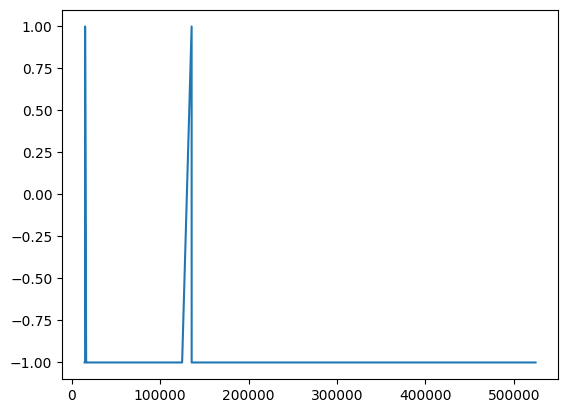

In [65]:
df[df['StockCode']=='AMAZONFEE']['Quantity'].plot();

#### Top 50 customers which purchase well

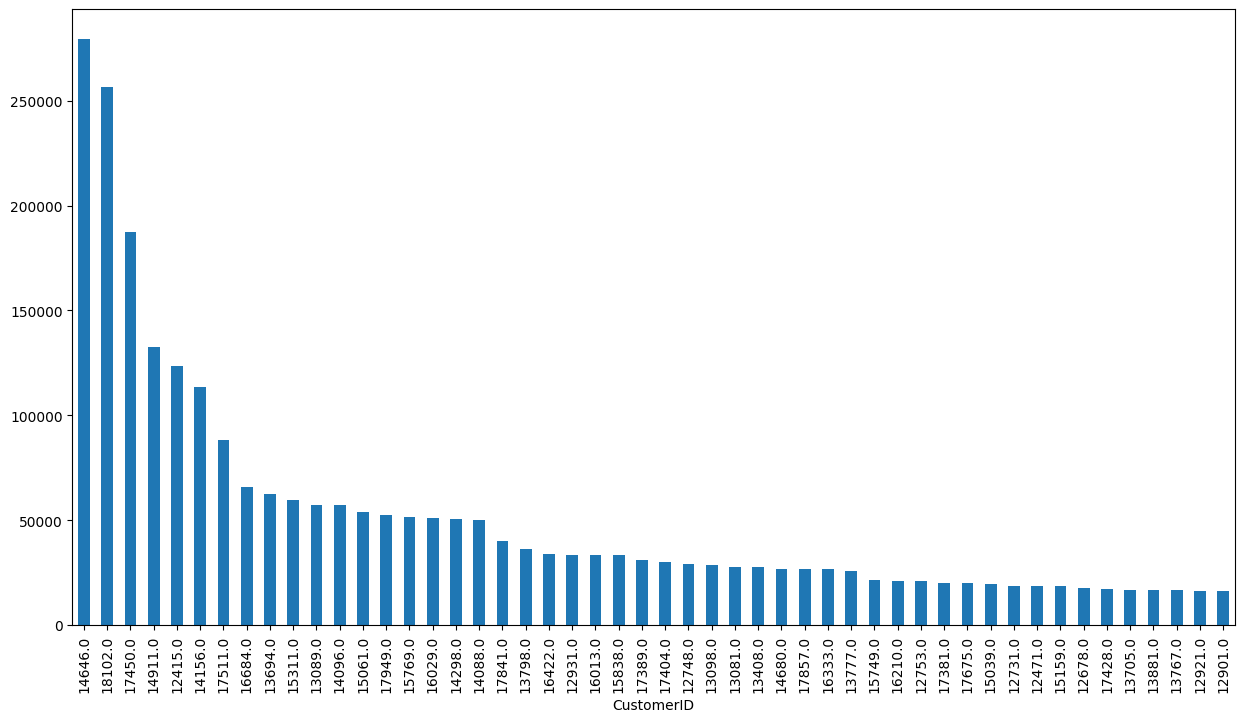

In [66]:
df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(15, 8));

#### Cumulative sum curve of customers which purchase well

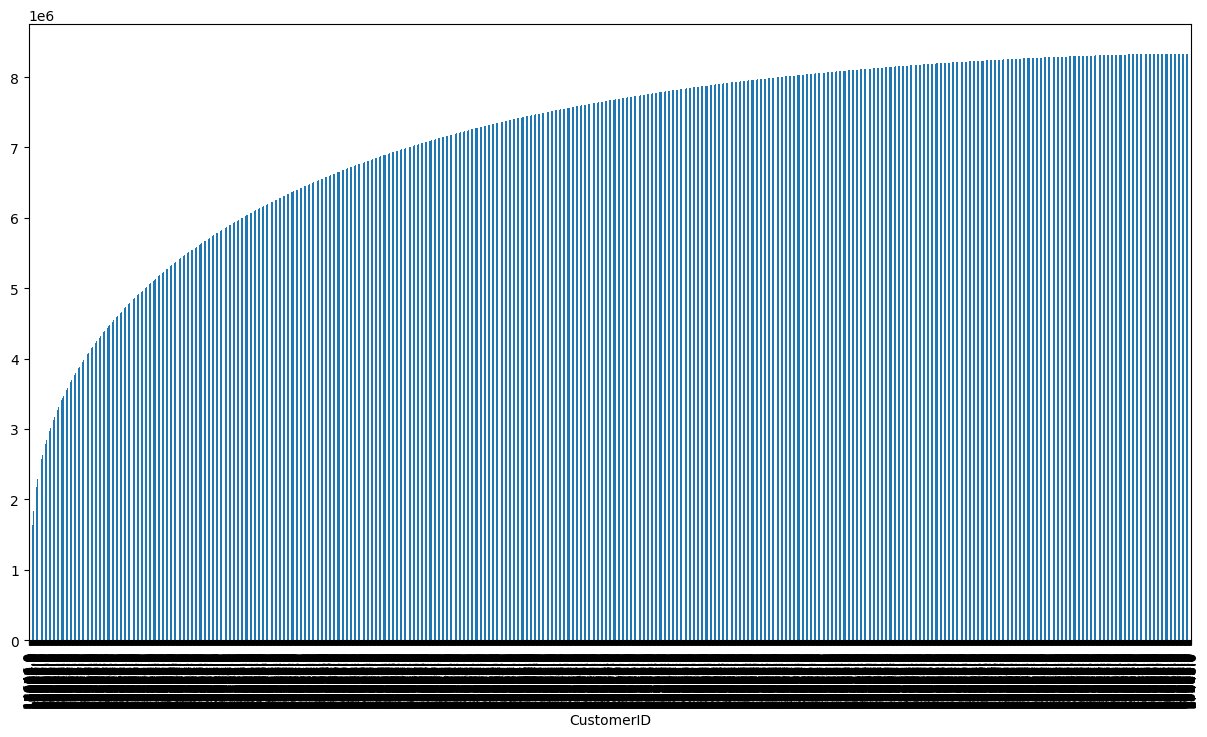

In [67]:
df_cus=pd.DataFrame(df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False))
df_cus['Amount'].cumsum().plot.bar(figsize=(15, 8));

In [68]:
df_cus['Amount'].head(1200).sum()/df_cus['Amount'].sum()

0.8054203765181636

In [69]:
1200/df_cus.index.nunique()

0.2744739249771272

#### 27% of custers occupy more than 80% of revenue.

#### Worst 50 customers which do not purchase well

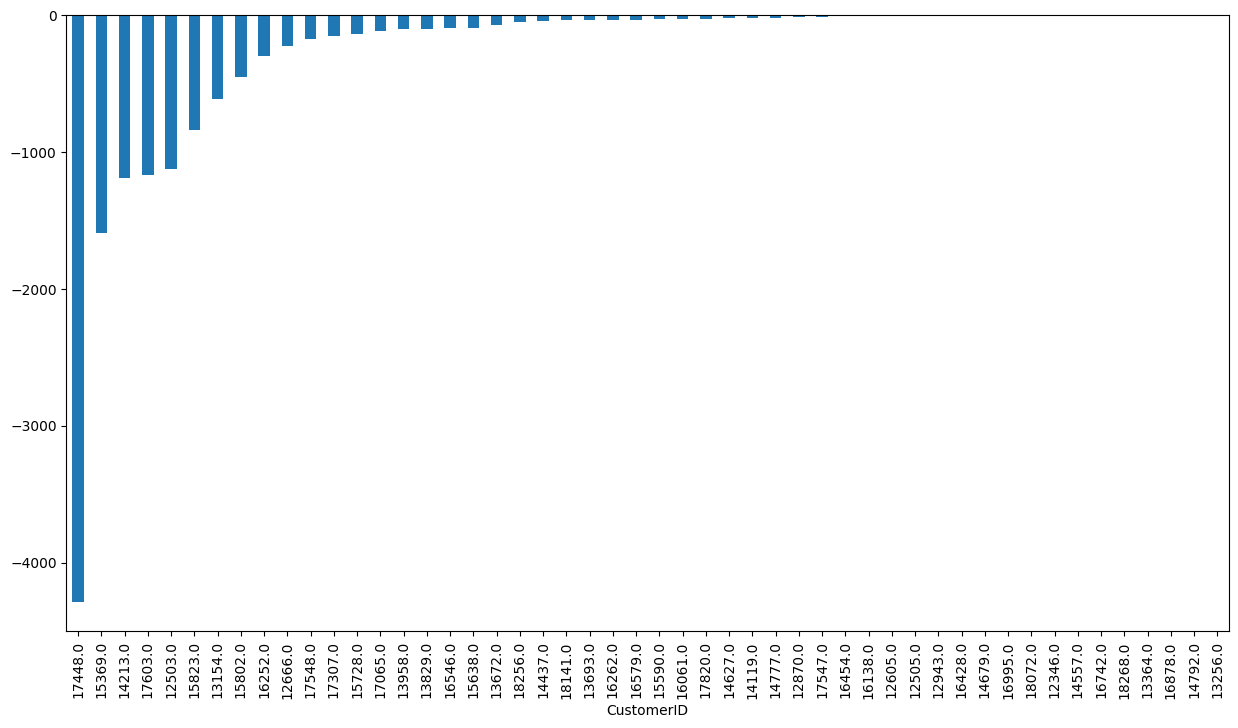

In [70]:
df.groupby('CustomerID')['Amount'].sum().sort_values(ascending=True).head(50).plot.bar(figsize=(15, 8));

#### Time Series, Unitprice Boxplot, Unitprice Time Series, Quantity Boxplot, Quantity Time Series of main customers, '14646', '18102' and '17450'

#### 1) 14646

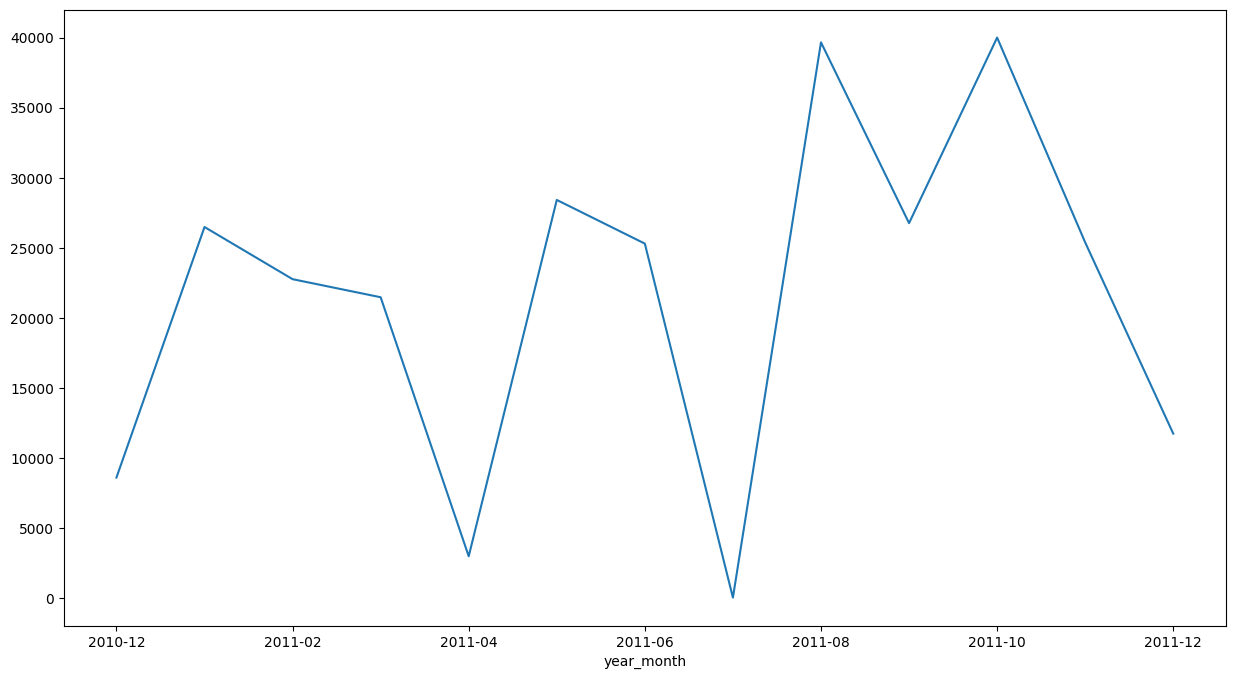

In [71]:
df[df['CustomerID']==14646.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

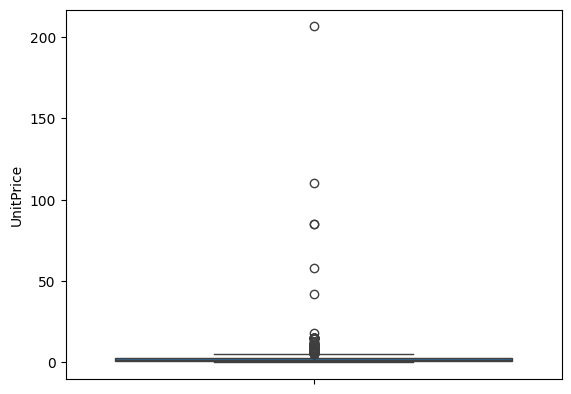

In [72]:
sns.boxplot(df[df['CustomerID']==14646.0]['UnitPrice']);

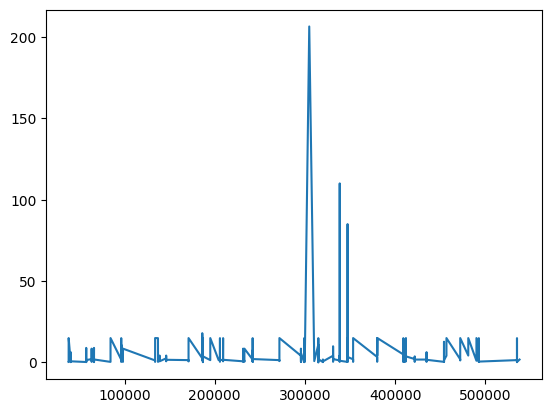

In [73]:
df[df['CustomerID']==14646.0]['UnitPrice'].plot();

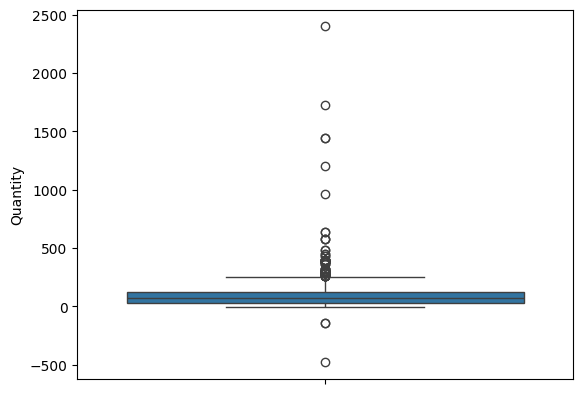

In [74]:
sns.boxplot(df[df['CustomerID']==14646.0]['Quantity']);

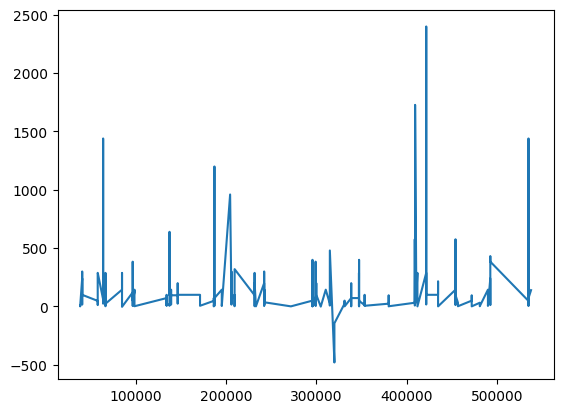

In [75]:
df[df['CustomerID']==14646.0]['Quantity'].plot();

#### 2) 18102

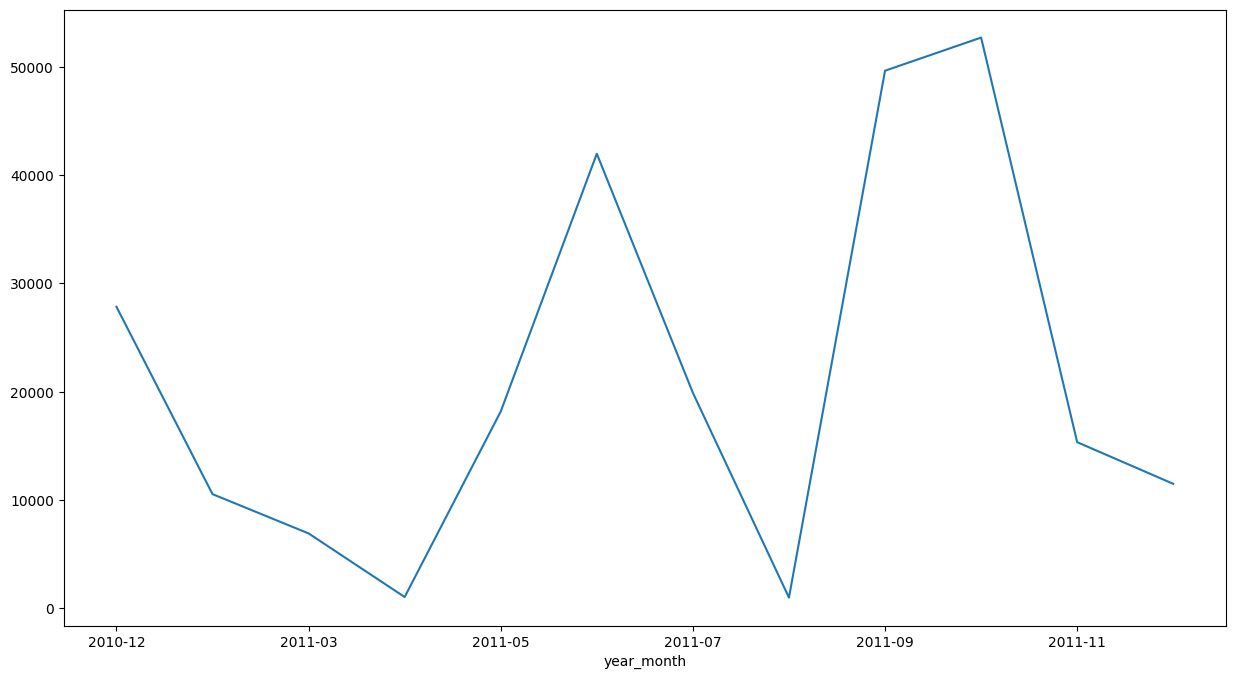

In [76]:
df[df['CustomerID']==18102.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

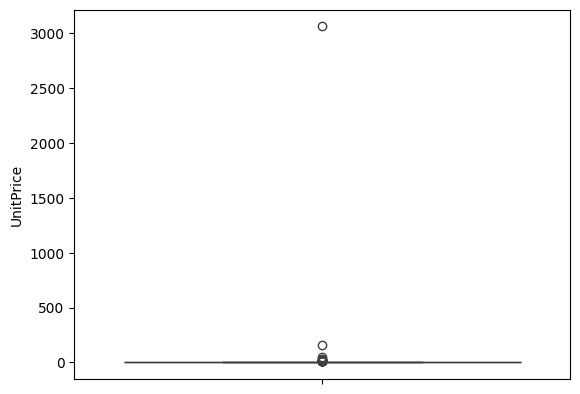

In [77]:
sns.boxplot(df[df['CustomerID']==18102.0]['UnitPrice']);

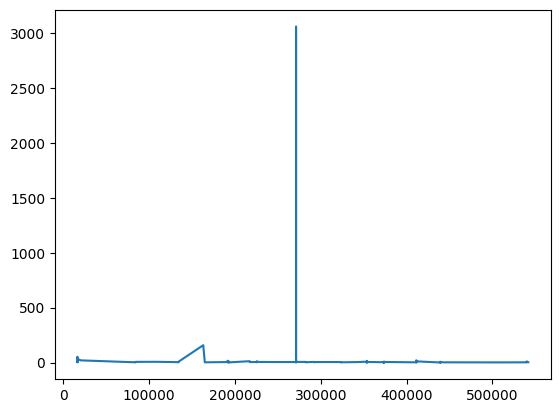

In [78]:
df[df['CustomerID']==18102.0]['UnitPrice'].plot();

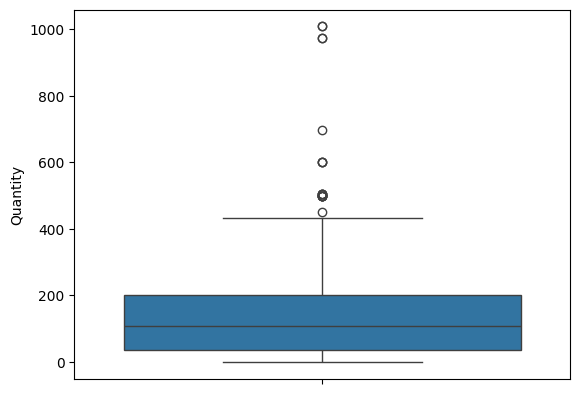

In [79]:
sns.boxplot(df[df['CustomerID']==18102.0]['Quantity']);

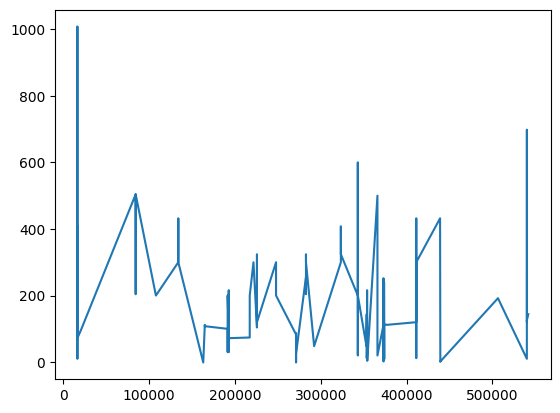

In [80]:
df[df['CustomerID']==18102.0]['Quantity'].plot();

#### 3) 17450

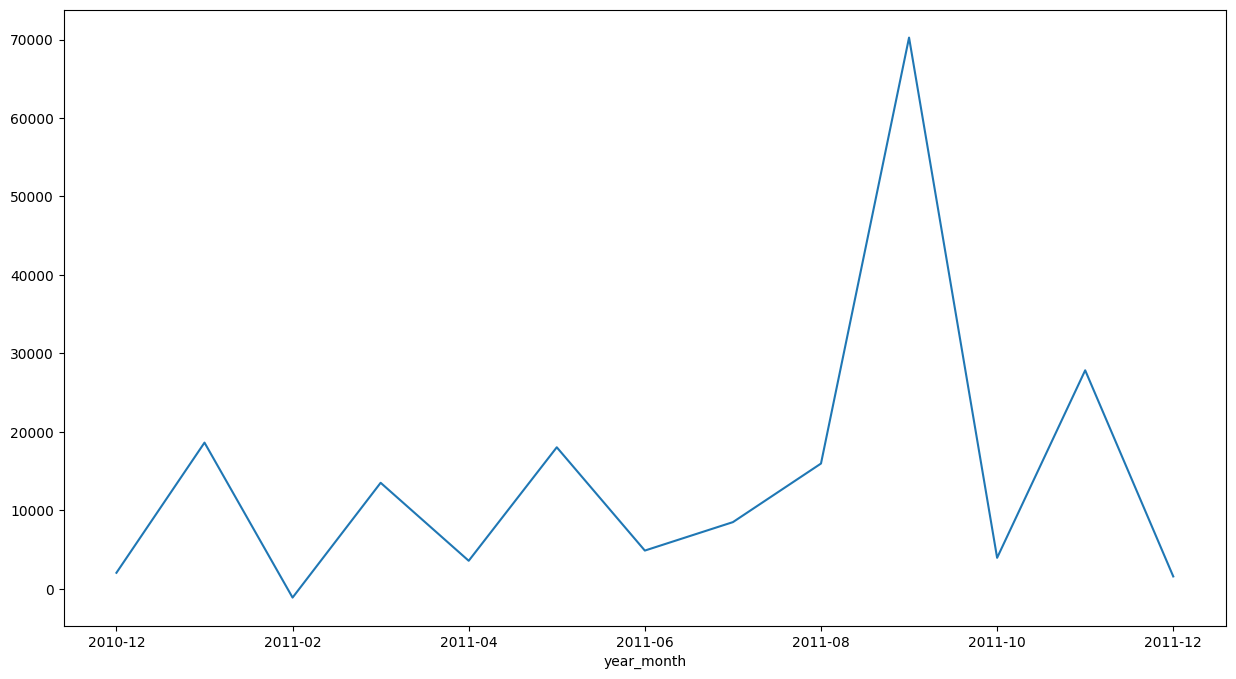

In [81]:
df[df['CustomerID']==17450.0].groupby('year_month')['Amount'].sum().plot(figsize=(15, 8));

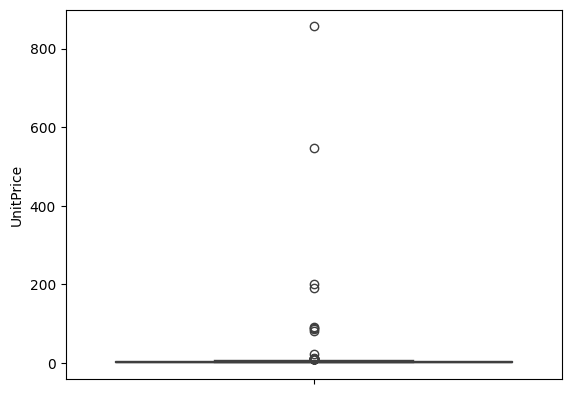

In [82]:
sns.boxplot(df[df['CustomerID']==17450.0]['UnitPrice']);

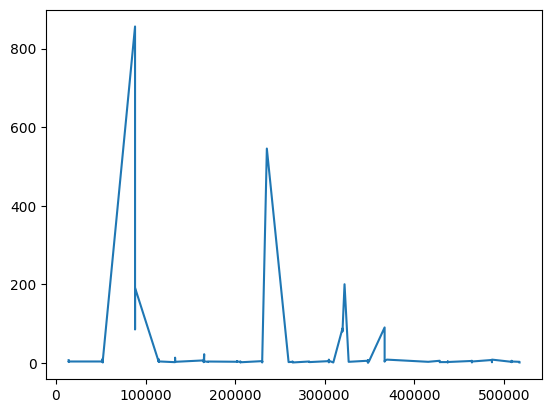

In [83]:
df[df['CustomerID']==17450.0]['UnitPrice'].plot();

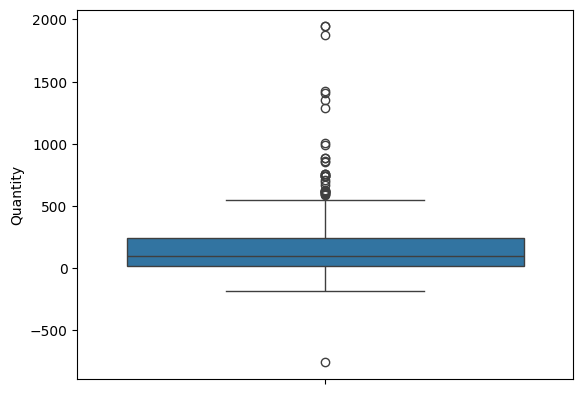

In [84]:
sns.boxplot(df[df['CustomerID']==17450.0]['Quantity']);

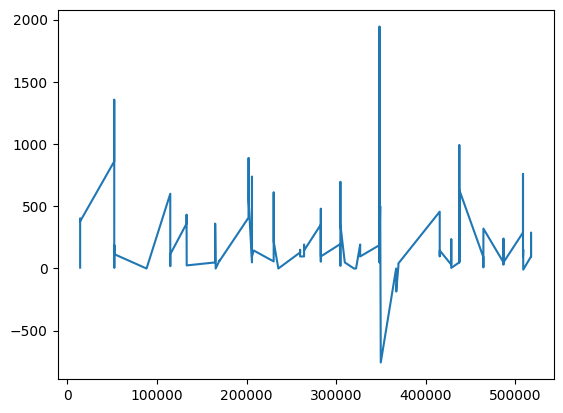

In [85]:
df[df['CustomerID']==17450.0]['Quantity'].plot();